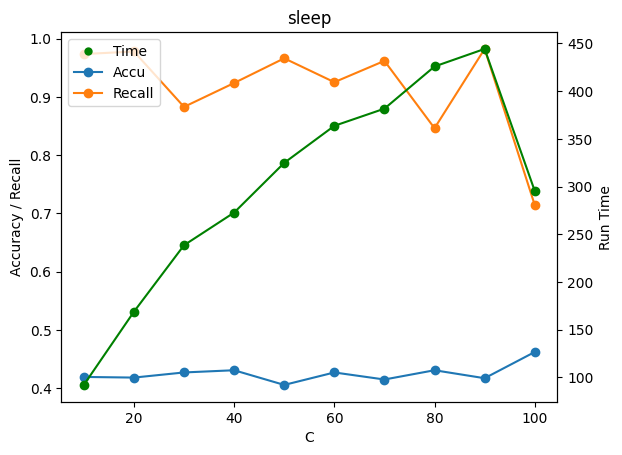

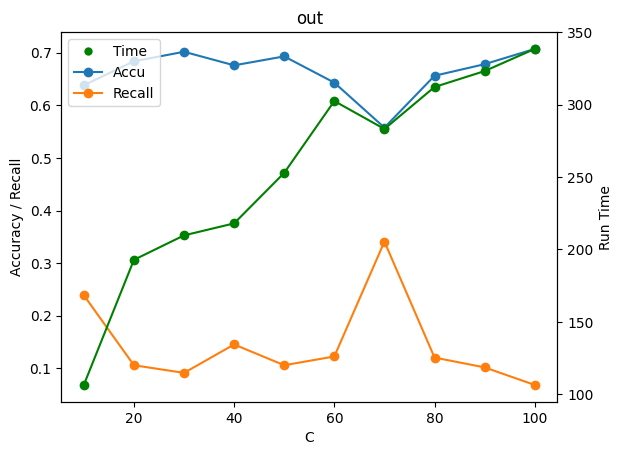

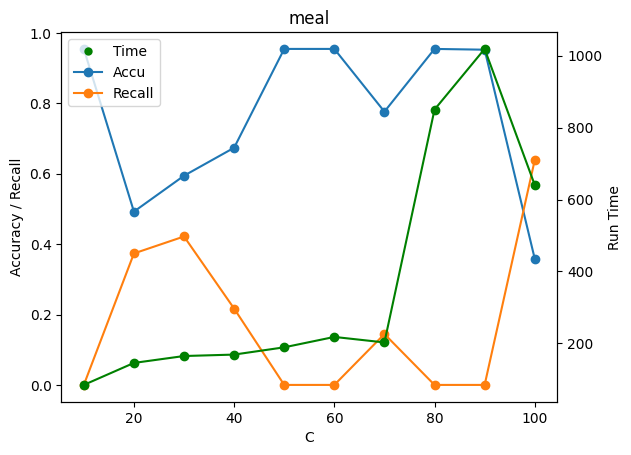

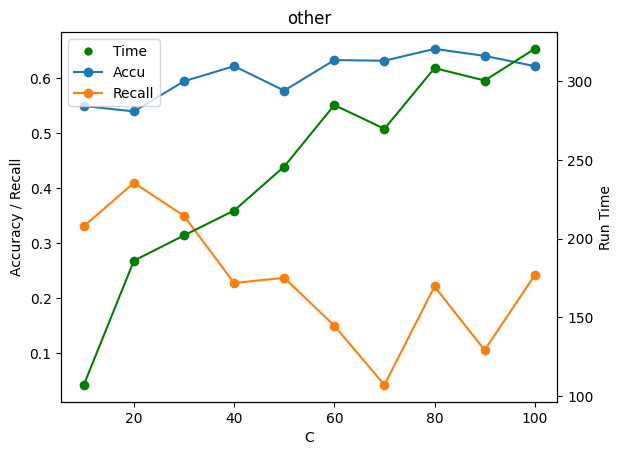

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取 CSV
df = pd.read_csv('TEPCO_result.csv')

# 選擇特定的 item
for item in ["sleep",'out','meal','other']:
    df_item = df[df['item'] == item]

    # 建立圖形和主軸
    fig, ax1 = plt.subplots()

    # 繪製 Accuracy 和 Recall 在主軸上
    ax1.plot(df_item['C'], df_item['accu'], marker='o', label='Accuracy')
    ax1.plot(df_item['C'], df_item['recall'], marker='o', label='Recall')
    ax1.set_xlabel('C')
    ax1.set_ylabel('Accuracy / Recall')
    ax1.legend(loc='upper left')

    # 建立與主軸共享 x 軸的副軸
    ax2 = ax1.twinx()

    # 在副軸上繪製 Run Time
    ax2.plot(df_item['C'], df_item['run_time'], marker='o', color='g', label='Run Time')
    ax2.set_ylabel('Run Time')

    # 創建一個假的 legend item 來在主軸的 legend 中添加 Run Time
    from matplotlib.lines import Line2D
    fake_line = Line2D([0], [0], linestyle='none', mfc='g', mec='none', marker='o')
    ax1.legend([fake_line] + ax1.lines, ['Time', 'Accu', 'Recall'], loc='upper left')

    # 添加標題
    plt.title(item)

    plt.show()


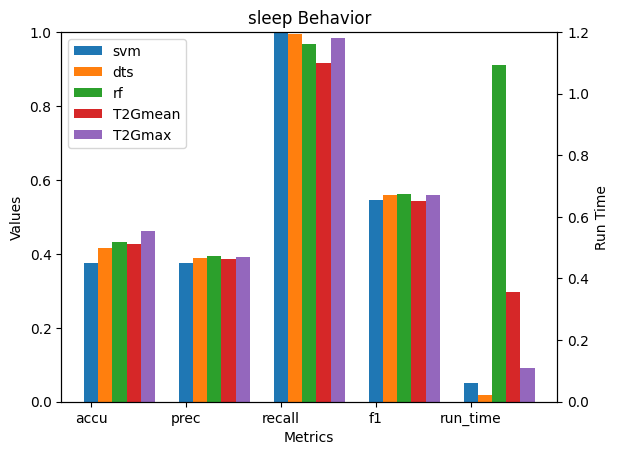

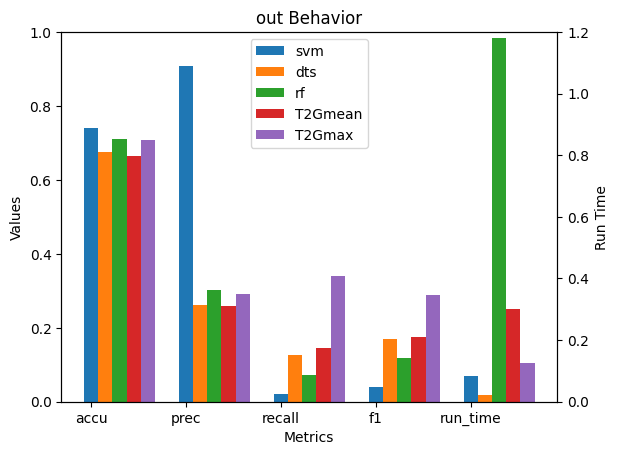

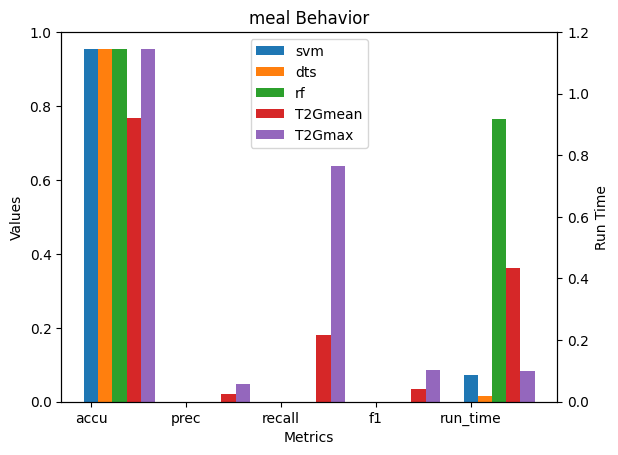

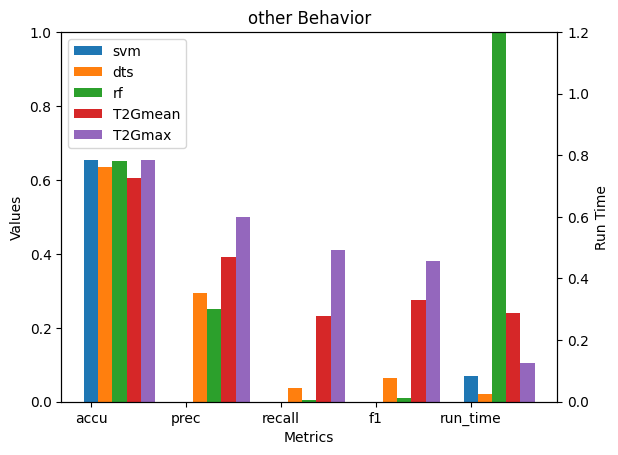

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
for pppp in ["sleep",'out','meal','other']:
# 讀取資料
    data = pd.read_csv('feature_base.csv')
    data["run_time"] /= max(data["run_time"])
    # 指定行為為sleep的資料
    sleep_data = data[data["behav"] == pppp]

    # 設定x軸和y軸資料
    x_axis = ["accu", "prec", "recall", "f1", "run_time"]
    y_data = sleep_data[x_axis].values

    # 設定每個kernel的索引位置
    bar_positions = np.arange(len(x_axis))

    # 設定bar的寬度
    bar_width = 0.15

    # 創建圖表
    fig, ax = plt.subplots()

    # 繪製每個kernel的長條
    for i, kernel in enumerate(sleep_data["kernel"]):
        ax.bar(bar_positions + i * bar_width, y_data[i], width=bar_width, label=kernel)

    # 設定x軸刻度
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(x_axis)
    ax.set_ylim(0, 1)
    # 設定標題和軸標籤
    ax.set_title(f"{pppp} Behavior")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")

    # 添加圖例
    ax.legend()

    # 添加右邊的y軸
    ax2 = ax.twinx()
    ax2.set_ylabel("Run Time")

    # 設定右邊y軸刻度
    ax2.set_ylim(0, max(data["run_time"]) * 1.2)

    # 顯示圖表
    plt.show()
